In [25]:
from qutip import Qobj, Bloch, basis, ket, tensor
import numpy as np 
import matplotlib.pyplot as plt
from collections import namedtuple

In [26]:
up, down = ket("0"), ket("1")
Direction = namedtuple("Direction", ["theta", "phi"])

In [27]:
# coverting a given direction in theta and phi to a qubit representation
def quantum_state(d):
    return np.cos(d.theta / 2) * up + np.exp(1j * d.phi) * np.sin(d.theta / 2) * down

In [28]:
# mesure the spin of the atom in Z direction only
def quantum_spin(q):
    a_up = (up.dag() * q).tr()
    prob_up = np.abs(a_up) ** 2
    return 1 if np.random.uniform(0, 1) <= prob_up else -1

In [29]:
def random_direction():
    r = 0
    while r == 0:
        x, y, z = np.random.normal(0, 1, 3)
        r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return Direction(theta=theta, phi=phi)

In [30]:
def quantum_stern_gerlach(n):
    """ Simulate the Stern-Gerlach experiment """
    directions = [random_direction() for _ in range(n)]
    atoms = [quantum_state(d) for d in directions]
    spins = [quantum_spin(q) for q in atoms]
    return atoms, spins

In [31]:
def plot_quantum_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Quantum Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#{:x}0{:x}0ff".format(i, i) for i in range(10)]
    b.add_states(atoms)
    b.render()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

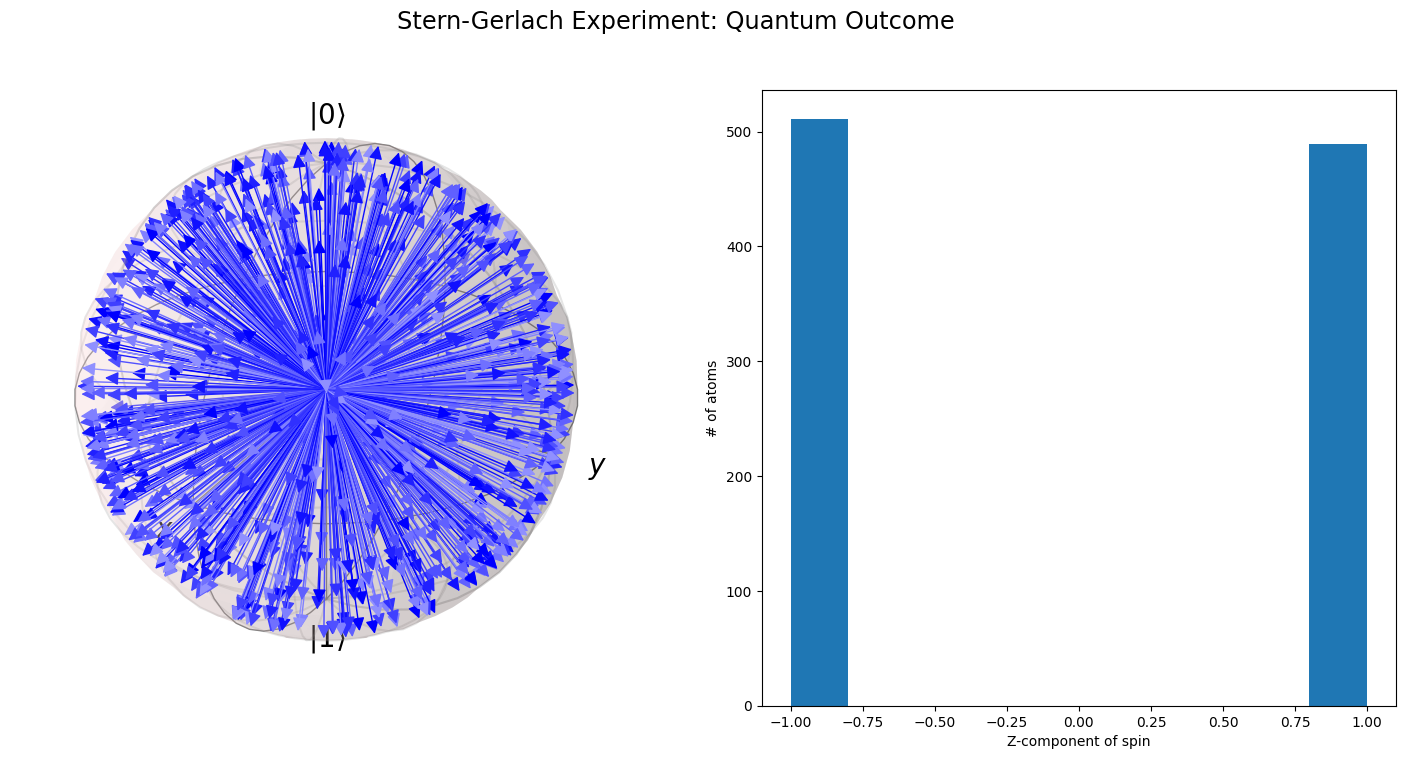

In [33]:
atoms, spins = quantum_stern_gerlach(1000)
plot_quantum_results(atoms, spins)

In [38]:
(ket("0") - 1j*ket("1"))/np.sqrt(2)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]